In [8]:
import numpy as np

with open("strace_results.txt") as f:
    lines = [line.strip() for line in f.readlines()]
    lines = lines[1:]

    ffi_begin_delay = []
    ffi_end_delay = []

    go_begin_delay = []
    go_end_delay = []

    for i in range(0, len(lines), 12):
        test = lines[i:i+12]
        ffi_part = test[1:6]
        go_part = test[7:]


        ffi_begin_1_ts = float(ffi_part[0].split()[0])
        ffi_begin_1_duration = float(ffi_part[0].split()[5].replace("<", "").replace(">", ""))

        ffi_begin_2_ts = float(ffi_part[1].split()[0])

        ffi_begin_delay.append(ffi_begin_2_ts - (ffi_begin_1_ts + ffi_begin_1_duration))

        ffi_end_1_ts = float(ffi_part[3].split()[0])
        ffi_end_1_duration = float(ffi_part[3].split()[6].replace("<", "").replace(">", ""))

        ffi_end_2_ts = float(ffi_part[4].split()[0])

        ffi_end_delay.append(ffi_end_2_ts - (ffi_end_1_ts + ffi_end_1_duration))

        go_begin_1_ts = float(go_part[0].split()[0])
        go_begin_1_duration = float(go_part[0].split()[5].replace("<", "").replace(">", ""))

        go_begin_2_ts = float(go_part[1].split()[0])

        go_begin_delay.append(go_begin_2_ts - (go_begin_1_ts + go_begin_1_duration))

        go_end_1_ts = float(go_part[3].split()[0])
        go_end_1_duration = float(go_part[3].split()[5].replace("<", "").replace(">", ""))

        go_end_2_ts = float(go_part[4].split()[0])

        go_end_delay.append(go_end_2_ts - (go_end_1_ts + go_end_1_duration))

    ffi_begin_delay = np.array(ffi_begin_delay)
    ffi_end_delay = np.array(ffi_end_delay)
    go_begin_delay = np.array(go_begin_delay)
    go_end_delay = np.array(go_end_delay)

    ffi_begin_delay_mean_us = np.mean(ffi_begin_delay) * 1_000_000
    ffi_end_delay_mean_us = np.mean(ffi_end_delay) * 1_000_000

    go_begin_delay_mean_us = np.mean(go_begin_delay) * 1_000_000
    go_end_delay_mean_us = np.mean(go_end_delay) * 1_000_000

    print(ffi_begin_delay_mean_us)
    print(ffi_end_delay_mean_us)

    print(go_begin_delay_mean_us)
    print(go_end_delay_mean_us)



172.55544662475586
152.18059221903482
144.80948448181152
146.59265677134195


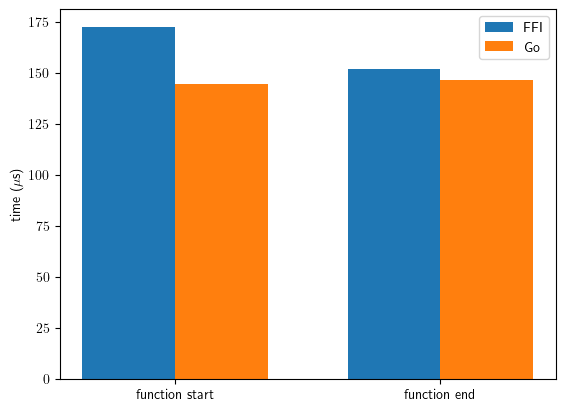

In [17]:
from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
})

labels = ["function start", "function end"]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width / 2, [ffi_begin_delay_mean_us, ffi_end_delay_mean_us], width, label="FFI")
ax.bar(x + width / 2, [go_begin_delay_mean_us, go_end_delay_mean_us], width, label="Go")
ax.set_ylabel(r"time ($\mu$s)")
ax.set_xticks(x, labels)
ax.legend()

plt.savefig("function_execution.pdf")